In [21]:
import tensorflow as tf
import numpy as np
import os 
from matplotlib import pyplot as plt

In [22]:
cpus = tf.config.experimental.list_physical_devices('CPU')

In [23]:
#If you are using GPUS
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [24]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

Filter out Bad Images - Remove unsupported extensions, very small images etc...

In [25]:
import cv2
import imghdr

In [26]:
data_dir = 'data'

In [27]:
image_extensions = ['jpg', 'jpeg', 'bmp', 'png']

In [29]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('Image not in extensions list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Load Classify Images in Data

In [30]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 189 files belonging to 2 classes.


2023-03-11 00:54:58.320858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
data_itr = data.as_numpy_iterator()

In [35]:
batch = data_itr.next()

In [36]:
batch[0].shape

(32, 256, 256, 3)

Figuring out how the classes are labeled (Should be another way around it but hardcoding it for now)

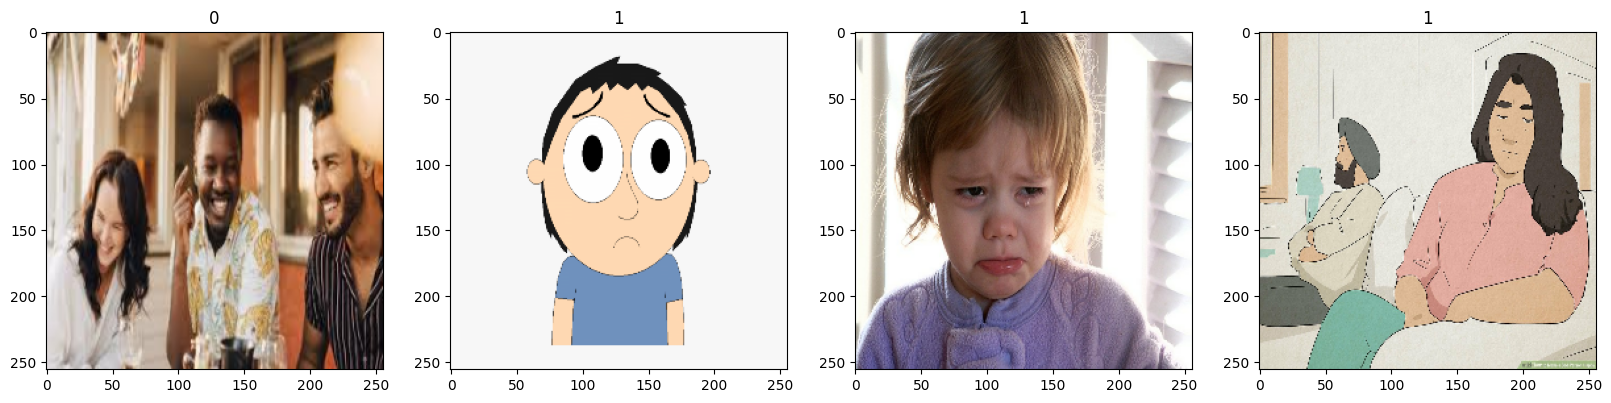

In [38]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])